In [56]:
import numpy as np
import pandas as pd #用来处理数据
import matplotlib.pyplot as plt 
import missingno as msno #查看缺失值

In [57]:
dataset= pd.read_csv('train.csv') #导入数据集
dataset.head(10)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,offline,hard,17019.0,M,Bachelors,3.0,28.0,2.0,N,4.0,1


In [58]:
#查看
dataset.describe()
#dataset.info()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


<AxesSubplot:>

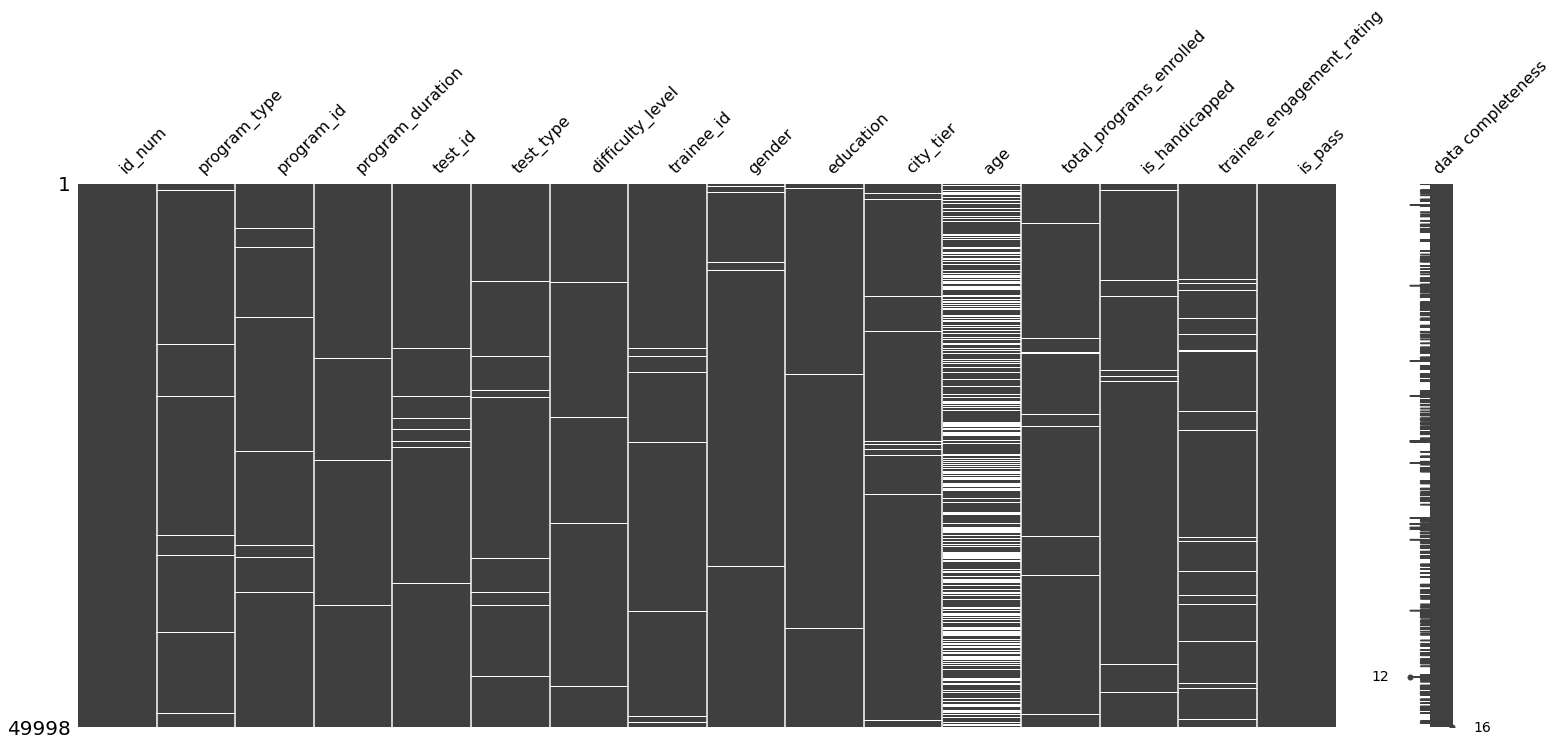

In [59]:
msno.matrix(dataset, labels = True)#由此可以看出，其他特征的缺失量并不大，所以选择直接删去其他特征缺失的数据，而年龄则选择填充数据。

In [60]:
#去除无关数据
dataset=dataset.drop(['id_num','program_id','test_id','trainee_id'],axis=1)

In [61]:
#查看
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   program_type               49267 non-null  object 
 1   program_duration           49323 non-null  float64
 2   test_type                  49296 non-null  object 
 3   difficulty_level           49295 non-null  object 
 4   gender                     49291 non-null  object 
 5   education                  49296 non-null  object 
 6   city_tier                  49298 non-null  float64
 7   age                        30619 non-null  float64
 8   total_programs_enrolled    49306 non-null  float64
 9   is_handicapped             49280 non-null  object 
 10  trainee_engagement_rating  49226 non-null  float64
 11  is_pass                    49998 non-null  int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 4.6+ MB


<AxesSubplot:>

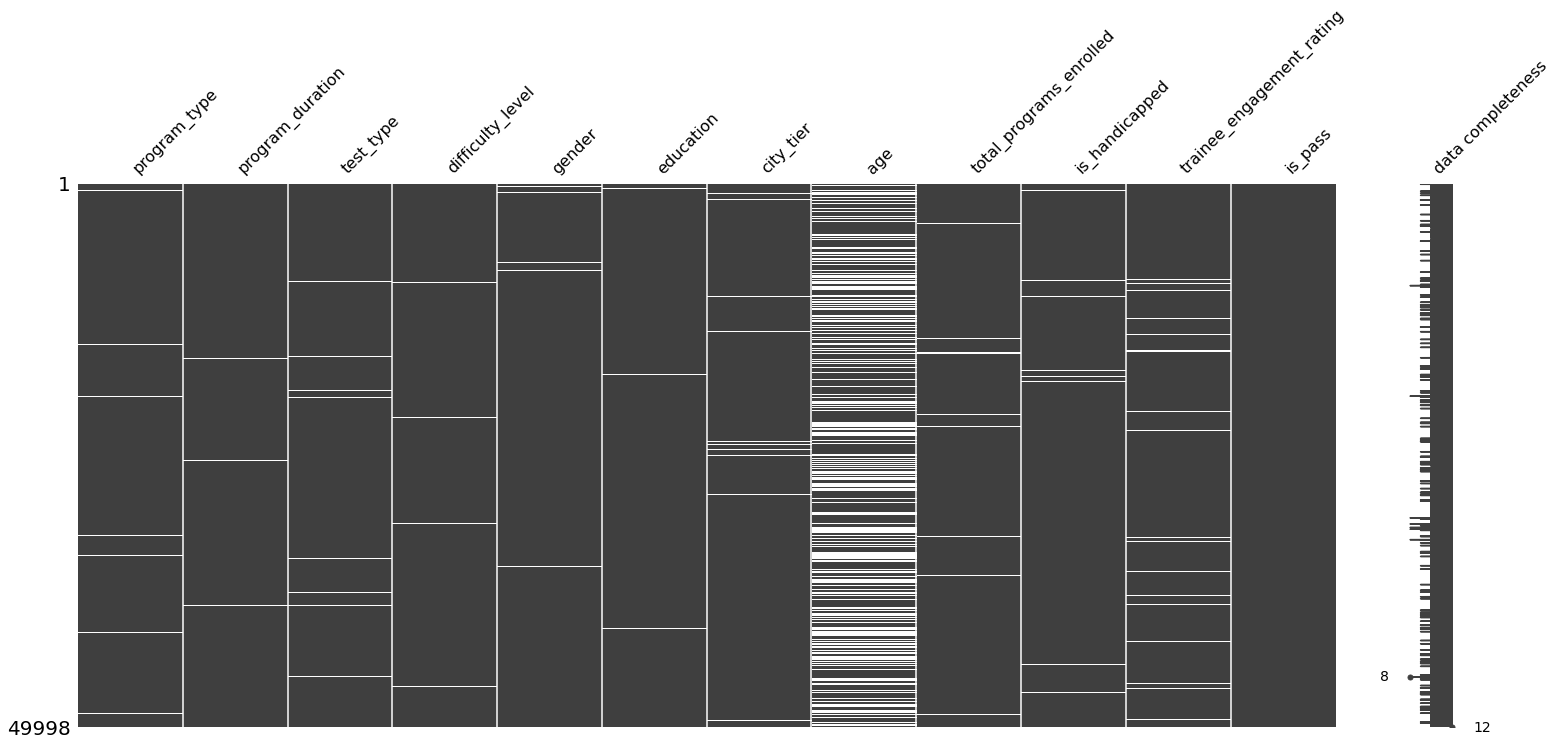

In [62]:
msno.matrix(dataset, labels = True)

In [63]:
dataset['age'] = dataset['age'].fillna(dataset['age'].mean())# 填充平均值
dataset['program_duration'] = dataset['program_duration'].fillna(dataset['program_duration'].mean())# 填充平均值
dataset['total_programs_enrolled'] = dataset['total_programs_enrolled'].fillna(dataset['total_programs_enrolled'].mean())# 填充平均值

In [64]:
#查看
dataset.describe()
#dataset.info()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49998.000000,49298.000000,49998.000000,49998.000000,49226.000000,49998.000000
mean,128.229366,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.843298,1.010896,7.078617,1.230792,1.326378,0.459864
min,117.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,1.000000,31.000000,2.000000,1.000000,0.000000
50%,131.000000,2.000000,36.514256,2.000000,2.000000,1.000000
75%,134.000000,3.000000,43.000000,3.000000,4.000000,1.000000
max,136.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [65]:
dataset=dataset.dropna(axis=0,how='any') #去除存在空值的行

In [66]:
dataset.describe()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,44543.000000,44543.000000,44543.000000,44543.000000,44543.000000,44543.000000
mean,128.223694,2.249467,36.508651,2.585781,2.396606,0.695440
std,6.840896,1.011229,7.070815,1.233849,1.325580,0.460226
min,117.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,1.000000,31.000000,2.000000,1.000000,0.000000
50%,131.000000,2.000000,36.514256,2.000000,2.000000,1.000000
75%,134.000000,3.000000,43.000000,3.000000,4.000000,1.000000
max,136.000000,4.000000,63.000000,14.000000,5.000000,1.000000


<AxesSubplot:>

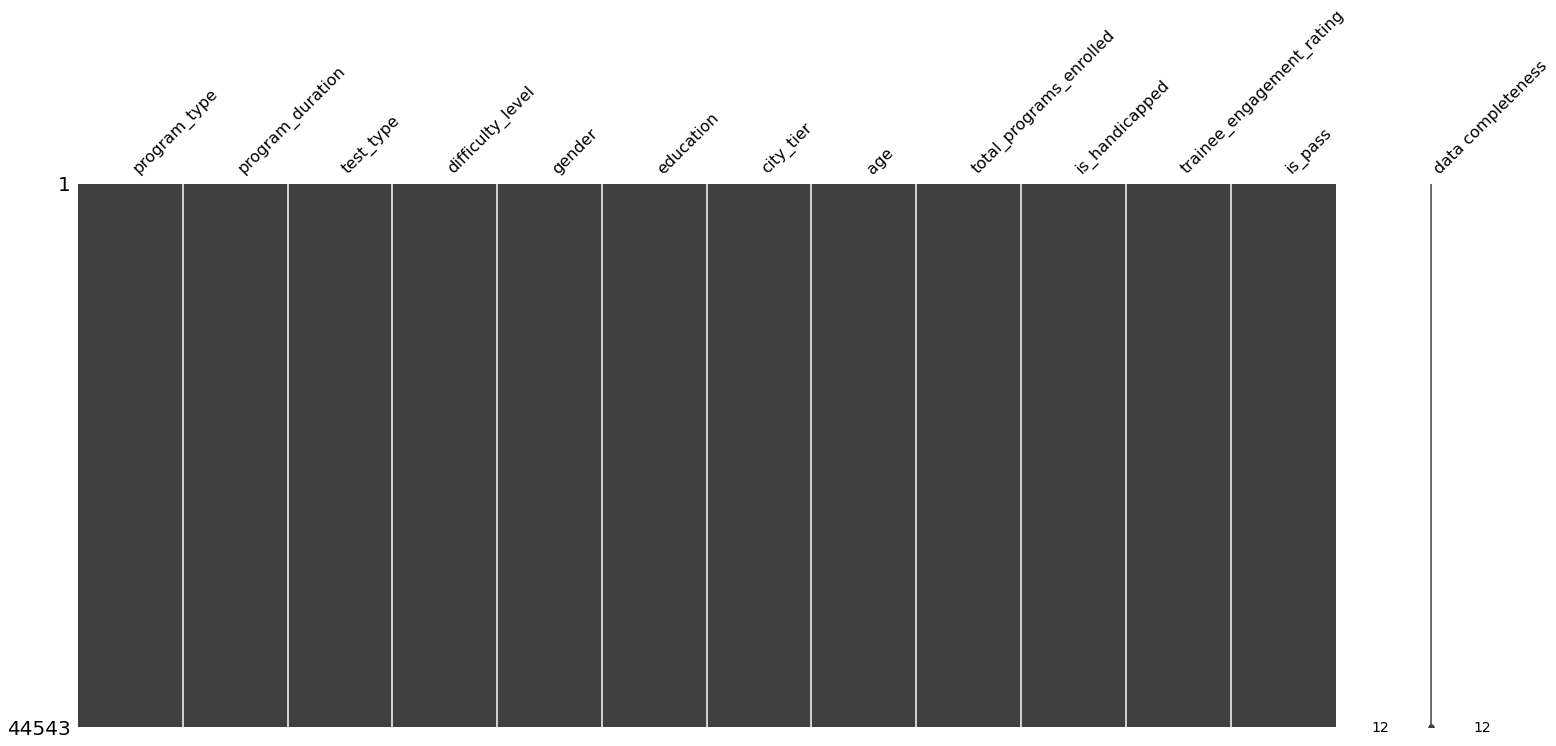

In [67]:
msno.matrix(dataset, labels = True)

In [68]:
print(dataset['program_type'].unique())

['Y' 'T' 'Z' 'V' 'U' 'X' 'S']


In [69]:
dataset.loc[dataset['gender'] == 'M', 'gender'] = 0 # gender等于M那行的gender值为0
dataset.loc[dataset['gender'] == 'F', 'gender'] = 1 # gender等于F那行的gender值为1
dataset.loc[dataset['test_type'] == 'offline', 'test_type'] = 0 # test_type等于M那行的test_type值为0
dataset.loc[dataset['test_type'] == 'online', 'test_type'] = 1 # test_type等于F那行的test_type值为1
dataset.loc[dataset['is_handicapped'] == 'N', 'is_handicapped'] = 0 # test_type等于M那行的test_type值为0
dataset.loc[dataset['is_handicapped'] == 'Y', 'is_handicapped'] = 1 # test_type等于F那行的test_type值为1
diff_level={
    'easy':0,
    'intermediate':1,
    'hard':2,
    'vary hard':3
}
edu={
    'No Qualification' : 0 ,
    'High School Diploma' : 1 ,
    'Matriculation' : 2 , 
    'Bachelors' : 3 ,
    'Masters' : 4
}
pro_text={
    'S':0,
    'T':1,
    'U':2,
    'V':3,
    'X':4,
    'Y':5,
    'Z':6
}
dataset['difficulty_level'] = dataset['difficulty_level'].map(diff_level)
dataset['education'] = dataset['education'].map(edu)
dataset['program_type'] = dataset['program_type'].map(pro_text)

In [70]:
print(dataset['difficulty_level'].unique())

[1 0 2 3]


In [71]:
dataset.describe()
#dataset.info()
# dataset['gender']
# dataset['test_type']

,program_type,program_duration,difficulty_level,education,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,44543.000000,44543.000000,44543.000000,44543.000000,44543.000000,44543.000000,44543.000000,44543.000000,44543.000000
mean,3.276497,128.223694,0.650136,1.688077,2.249467,36.508651,2.585781,2.396606,0.695440
std,1.817035,6.840896,0.823247,0.765250,1.011229,7.070815,1.233849,1.325580,0.460226
min,0.000000,117.000000,0.000000,0.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,1.000000,121.000000,0.000000,1.000000,1.000000,31.000000,2.000000,1.000000,0.000000
50%,3.000000,131.000000,0.000000,2.000000,2.000000,36.514256,2.000000,2.000000,1.000000
75%,5.000000,134.000000,1.000000,2.000000,3.000000,43.000000,3.000000,4.000000,1.000000
max,6.000000,136.000000,3.000000,4.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [72]:
#分割测试集和训练集
from sklearn.model_selection import train_test_split
x_features=[ 'program_type','program_duration', 'test_type' , 'difficulty_level' ,  'gender'  , 'education' , 'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped', 'trainee_engagement_rating']
X_train, X_test, Y_train, Y_test = train_test_split( dataset[x_features],dataset["is_pass"] , test_size = 0.2, random_state = 66)
#全做测试集
# Y_train=dataset['is_pass']
# X_train=dataset.drop('is_pass',axis=1)

In [73]:
#特征缩放
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [74]:
#归一
import sklearn.preprocessing as sp
mms = sp.MinMaxScaler(feature_range=(0,1))
X_train = mms.fit_transform(X_train)

<ipython-input-75-2f1deb1fa2d1>:6: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


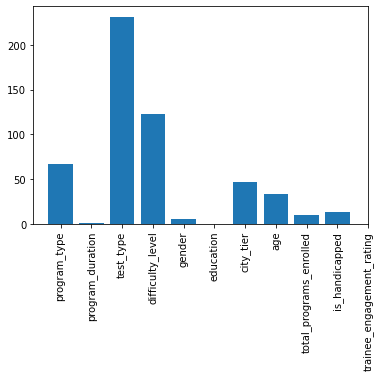

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif # 特征选择库
import matplotlib.pyplot as plt # 画出直方图，分析特征的权重
x_features=[ 'program_type','program_duration', 'test_type' , 'difficulty_level' ,  'gender'  , 'education' , 'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped', 'trainee_engagement_rating']
selector = SelectKBest(f_classif, k=4)
selector.fit(dataset[x_features],dataset["is_pass"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(x_features)), scores)
plt.xticks(range(len(x_features)), x_features, rotation='vertical')
plt.show()


In [76]:
# X_test

In [77]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

alg = LogisticRegression(random_state=1, solver='liblinear') # 初始化逻辑回归类


alg.fit(X_train ,Y_train)    # 拟合

# 预测测试集
predictions = alg.predict(X_test)

# 打印准确率
print('测试集准确率：', accuracy_score(Y_test, predictions))

# 逻辑回归交叉验证
score = model_selection.cross_val_score(alg,dataset[x_features],dataset["is_pass"], cv=3)
print("准确率为：", score.mean())

测试集准确率： 0.6291390728476821
准确率为： 0.7044877808725629


In [78]:
predictions[:500]

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,

In [79]:
dataset_test= pd.read_csv('test2.csv') #导入数据集

In [80]:
dataset_test.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,11465.000000,11465.000000,11465.000000,11465.000000,7068.000000,11465.000000,11451.000000,0.0
mean,128.179067,90.116616,9801.775142,2.232708,36.352292,2.581771,2.382150,NaN
std,6.890919,51.172182,5658.995423,1.012618,8.993219,1.229564,1.314206,NaN
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,NaN
25%,121.000000,44.000000,5054.000000,1.000000,28.000000,2.000000,1.000000,NaN
50%,131.000000,89.000000,9580.000000,2.000000,39.000000,2.000000,2.000000,NaN
75%,134.000000,134.000000,14429.000000,3.000000,45.000000,3.000000,3.000000,NaN
max,136.000000,187.000000,20096.000000,4.000000,59.000000,12.000000,5.000000,NaN


In [81]:
#去除无关数据
dataset_test=dataset_test.drop(['id_num','program_id','test_id','trainee_id','is_pass'],axis=1)
#填充
dataset_test['age'] = dataset_test['age'].fillna(dataset_test['age'].mean())# 填充平均值
dataset_test['trainee_engagement_rating'] = dataset_test['trainee_engagement_rating'].fillna(dataset_test['trainee_engagement_rating'].mean())# 填充平均值
#独热
dataset_test.loc[dataset_test['gender'] == 'F', 'gender'] = 1 # gender等于F那行的gender值为1
dataset_test.loc[dataset_test['gender'] == 'M', 'gender'] = 0 # gender等于M那行的gender值为0
dataset_test.loc[dataset_test['test_type'] == 'offline', 'test_type'] = 0 # test_type等于M那行的test_type值为0
dataset_test.loc[dataset_test['test_type'] == 'online', 'test_type'] = 1 # test_type等于F那行的test_type值为1
dataset_test.loc[dataset_test['is_handicapped'] == 'N', 'is_handicapped'] = 0 # test_type等于M那行的test_type值为0
dataset_test.loc[dataset_test['is_handicapped'] == 'Y', 'is_handicapped'] = 1 # test_type等于F那行的test_type值为1
diff_level={
    'easy':0,
    'intermediate':1,
    'hard':2,
    'vary hard':3
}
edu={
    'No Qualification' : 0 ,
    'High School Diploma' : 1 ,
    'Matriculation' : 2 , 
    'Bachelors' : 3 ,
    'Masters' : 4
}
pro_text={
    'S':0,
    'T':1,
    'U':2,
    'V':3,
    'X':4,
    'Y':5,
    'Z':6
}
dataset_test['difficulty_level'] = dataset_test['difficulty_level'].map(diff_level)
dataset_test['education'] = dataset_test['education'].map(edu)
dataset_test['program_type'] = dataset_test['program_type'].map(pro_text)

In [82]:
dataset_test.describe()

,program_type,program_duration,difficulty_level,education,city_tier,age,total_programs_enrolled,trainee_engagement_rating
count,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000
mean,3.237680,128.179067,0.644047,1.686786,2.232708,36.352292,2.581771,2.382150
std,1.816641,6.890919,0.825828,0.764614,1.012618,7.060975,1.229564,1.313403
min,0.000000,117.000000,0.000000,0.000000,1.000000,17.000000,1.000000,1.000000
25%,1.000000,121.000000,0.000000,1.000000,1.000000,30.000000,2.000000,1.000000
50%,3.000000,131.000000,0.000000,2.000000,2.000000,36.352292,2.000000,2.000000
75%,5.000000,134.000000,1.000000,2.000000,3.000000,43.000000,3.000000,3.000000
max,6.000000,136.000000,3.000000,4.000000,4.000000,59.000000,12.000000,5.000000


In [83]:
#特征缩放
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
dataset_test = sc_X.fit_transform(dataset_test)
# X_test = sc_X.transform(X_test)
#归一
import sklearn.preprocessing as sp
mms = sp.MinMaxScaler(feature_range=(0,1))
dataset_test = mms.fit_transform(dataset_test)

In [84]:
dataset_test[:500]

array([[0.16666667, 0.89473684, 1.        , ..., 0.27272727, 0.        ,
        0.25      ],
       [0.83333333, 0.15789474, 1.        , ..., 0.09090909, 0.        ,
        0.75      ],
       [0.83333333, 0.21052632, 0.        , ..., 0.18181818, 0.        ,
        0.        ],
       ...,
       [0.83333333, 0.94736842, 0.        , ..., 0.18181818, 0.        ,
        0.75      ],
       [0.16666667, 0.89473684, 1.        , ..., 0.09090909, 0.        ,
        0.        ],
       [0.83333333, 0.21052632, 1.        , ..., 0.09090909, 0.        ,
        1.        ]])

In [85]:
predictions = alg.predict(dataset_test) #预测

In [86]:
predictions[:500]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [87]:
len(predictions)

11465

In [88]:
#将数据导出
data = pd.read_csv('submission2.csv')

data['is_pass'] = predictions 

data.to_csv('submission2.csv',mode = 'w')

#mode=a，以追加模式写入,header表示列名，默认为true,index表示行名，默认为true，再次写入不需要行名
